<a href="https://colab.research.google.com/github/babybeth/Python-data-analysis-project-FoodHub/blob/main/PYF_Project_LearnerNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

###Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
#Libraries to read and manipulate data
import numpy as np
import pandas as pd

#Libraries to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

#Libraries to display graphs
%matplotlib  inline

#To restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
!jupyter nbconvert --to html /content/PYF_Project_LearnerNotebook.ipynb

[NbConvertApp] Converting notebook /content/PYF_Project_LearnerNotebook.ipynb to html
[NbConvertApp] Writing 3866285 bytes to /content/PYF_Project_LearnerNotebook.html


**Importing the dataset**

In [ ]:
df = pd.read_csv('/content/foodhub_order.csv')

###Understand the structure of data by performing the following steps:
- ####          Display the first 5 rows and last 5 rows of the dataset
- ####          Check the number of rows and columns
- ####          Check the statistical summary of the numeric columns
- ####          Find the details of datatype and presence of null values in each column



**First 5 rows of dataset**

In [ ]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24


**Last 5 rows of the dataset**

In [ ]:
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.310,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.180,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.220,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.180,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.450,Weekend,Not given,28,24


Observations:
The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?  [0.5 mark]

In [ ]:
print("There are ",df.shape[0] ," rows and " ,df.shape[1] ," columns")


There are  1898  rows and  9  columns


Shape of dataset is 1898 rows and 9 columns

### **Question 2:** What are the datatypes of the different columns in the dataset?  [0.5 mark]

**Check for the datatypes of the columns**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


- *There are 5 numeric columns of which cost_of_the_order is float type and 4 object type columns*
- *There are no null values in  any columns as all columns has 1898 values*
- *Order id and Customer id are int values*
- *Rating is object type.We need to check why it is string type.It has to be converted to a float type for performing any mathematical calculations on rating variable for further analysis*

In [ ]:
####Find the unique values of rating to see why rating is object datatype
df['rating'].value_counts(dropna=False,normalize = True)*100

Not given   38.778
5           30.980
4           20.337
3            9.905
Name: rating, dtype: float64

- *38.78% of the orders are not rated and is filled as 'Not Given' which is why it is object type*
- *All who rated have given a rating of 3 or above which is a good sign that customers have a positive opinion for the app*
-*There are no ratings below 3*

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method.[1 mark]

In [ ]:
####Check for the missing values in the dataset
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

- *There are no missing values in the dataset for any columns


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?  [2 marks]

In [ ]:
####Check the statistical summary
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.000,NaN,NaN,NaN,1477495.500,548.050,1476547.000,1477021.250,1477495.500,1477969.750,1478444.000
customer_id,1898.000,NaN,NaN,NaN,171168.478,113698.140,1311.000,77787.750,128600.000,270525.000,405334.000
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.000,NaN,NaN,NaN,16.499,7.484,4.470,12.080,14.140,22.297,35.410
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.000,NaN,NaN,NaN,27.372,4.632,20.000,23.000,27.000,31.000,35.000
delivery_time,1898.000,NaN,NaN,NaN,24.162,4.973,15.000,20.000,25.000,28.000,33.000


- *Cost of the order - The average cost of the order is 16.5 dollars which is higher thean the median value. This indicates that the cost of order is right skewed. 75% of orders cost below 22.29 dollars.The max values for cost of the order is high as compared to 75% value. Hence there is a chance for right skewness in the distribution of data in this column*

- *Food Preperation Time - 50% of orders have a preperation time within 27 min and average preperation time of 27.37 min is close to the median value of 27 min.This indicates that the distribution of cost of the order might be uniformly distributed*

- *The minimum, maximum and average food preperation time are 20 mins, 35 mins and 27.37mins respectively*

- *Delivery Time  - The average delivery time of 24.16mins is close to the median value of 25mins.But the difference between 25% and 50% order delivery time is more as compared to the 75% range. This indicates that the distribution for delivery time is left skewed*







### **Question 5:** How many orders are not rated?  [1 mark]

In [ ]:
####Find the number of orders that are not rated
df[df['rating']=='Not given']['order_id'].count()

736

- *There are 736 orders that are not rated*

In [ ]:
####Find the orders that are not rated
df[df['rating']=='Not given']

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23
6,1477894,157711,The Meatball Shop,Italian,6.070,Weekend,Not given,28,21
10,1477895,143926,Big Wong Restaurant _¤¾Ñ¼,Chinese,5.920,Weekday,Not given,34,28
14,1478198,62667,Lucky's Famous Burgers,American,12.130,Weekday,Not given,23,30
...,...,...,...,...,...,...,...,...,...
1887,1476873,237616,Shake Shack,American,5.820,Weekend,Not given,26,30
1891,1476981,138586,Shake Shack,American,5.820,Weekend,Not given,22,28
1892,1477473,97838,Han Dynasty,Chinese,29.150,Weekend,Not given,29,21
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.220,Weekday,Not given,31,24


- *These unrated orders are a major part of the dataset. Hence their ratings need to be properly handled. They need to be handled properly for advanced analysis*

**Check for the duplicated entries in the dataset**

In [ ]:
df.duplicated().sum()

0

- *There are no duplicate entries in the dataset*

**Check the count and percentage of each categorical levels in the dataset**

In [ ]:
####Make a list of all the categoric variables whose distribution need to be checked
categoric_col = ['restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating']

In [ ]:
for col in categoric_col:
    print(df[col].value_counts(normalize = True))
    print('-'*50)


Shake Shack                 0.115
The Meatball Shop           0.070
Blue Ribbon Sushi           0.063
Blue Ribbon Fried Chicken   0.051
Parm                        0.036
                             ... 
Sushi Choshi                0.001
Dos Caminos Soho            0.001
La Follia                   0.001
Philippe Chow               0.001
'wichcraft                  0.001
Name: restaurant_name, Length: 178, dtype: float64
--------------------------------------------------
American         0.308
Japanese         0.248
Italian          0.157
Chinese          0.113
Mexican          0.041
Indian           0.038
Middle Eastern   0.026
Mediterranean    0.024
Thai             0.010
French           0.009
Southern         0.009
Korean           0.007
Spanish          0.006
Vietnamese       0.004
Name: cuisine_type, dtype: float64
--------------------------------------------------
12.180   0.045
12.130   0.043
12.230   0.025
24.200   0.022
29.100   0.019
          ... 
5.480    0.001
17.070   0.

### Exploratory Data Analysis (EDA)

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.)  [9 marks]

**Univariate Analysis**

**Distribution of orders**
####Evenif order_id is a numeric data,it is a unique identifier in the dataset. Hence it is not used in the univariate analysis

**Distribution of customers**

In [ ]:
plt.style.use('ggplot')

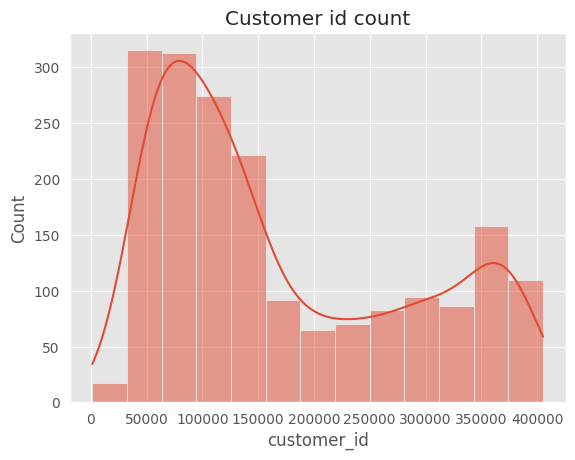

In [ ]:
sns.histplot(data = df, x = 'customer_id', kde = True)
plt.title("Customer id count")
plt.show()

- *There is a right skewness in the distribution of customer_id*
- Majority of customers have a customer id ranging from 5000 to 15000

**Distribution of Cost of order**

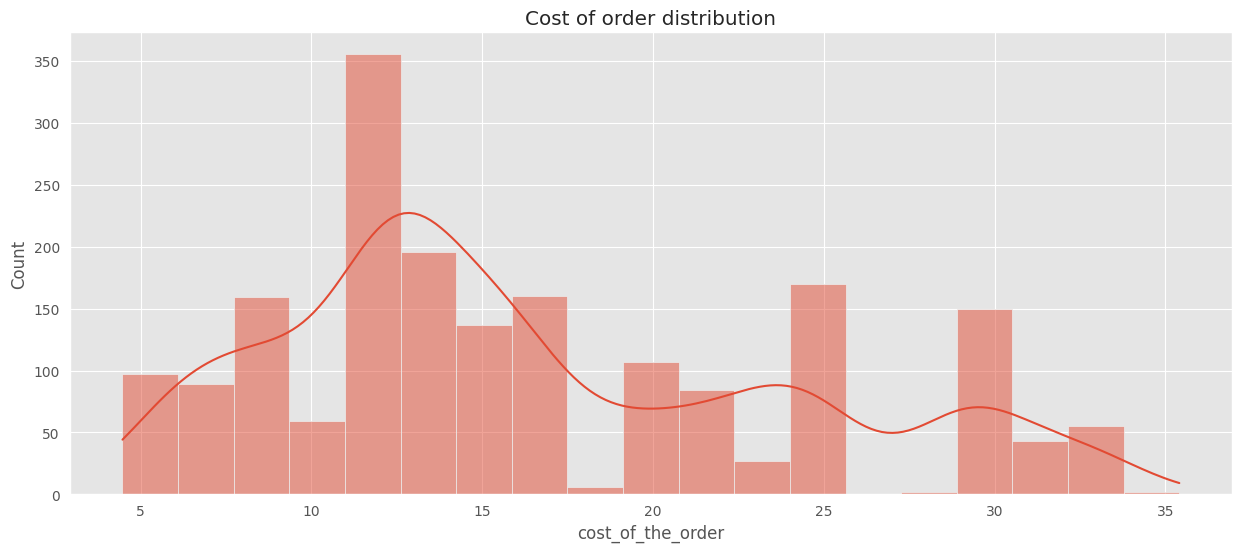

In [ ]:
plt.figure(figsize = (15,6))
sns.histplot(df,x ='cost_of_the_order', kde = True)
plt.title('Cost of order distribution')
plt.show()

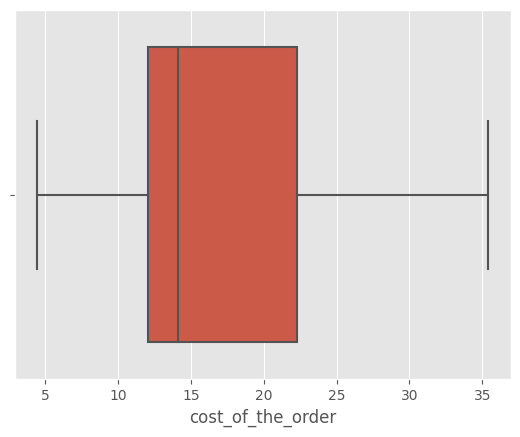

In [ ]:
sns.boxplot(data=df,x ='cost_of_the_order')
plt.show()

- *There is a right skewness in the data for cost of order*
- *50% of the orders lie between 12 and 22.5 dollars*
- *Median cost is about 14 dollars which means about atmost 50% of orders were below 14 dollars*
- *75% of orders are above 12 dollars*
- *There are no outliers in the data for cost of the order*

**Distribution of Food Preperation Time**

<Figure size 1500x600 with 0 Axes>

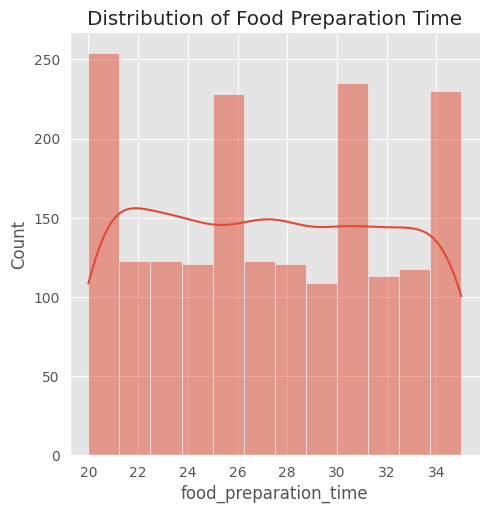

In [ ]:
plt.figure(figsize = (15,6));
sns.displot(data = df, x = 'food_preparation_time', kde = True);
plt.title('Distribution of Food Preparation Time')
plt.show()

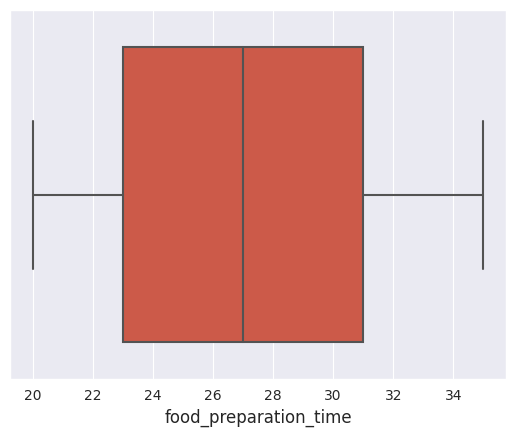

In [ ]:
sns.boxplot(data = df, x = 'food_preparation_time')
plt.show()

- *The data for food preperation time is uniformly distributed*
- *There are no outliers*
- *Median value of food preparation time is 27 mins and 50% of orders were prepared in a time range of 23 to 31 mins*

**Distribution of Order Delivery time**

<Figure size 1500x600 with 0 Axes>

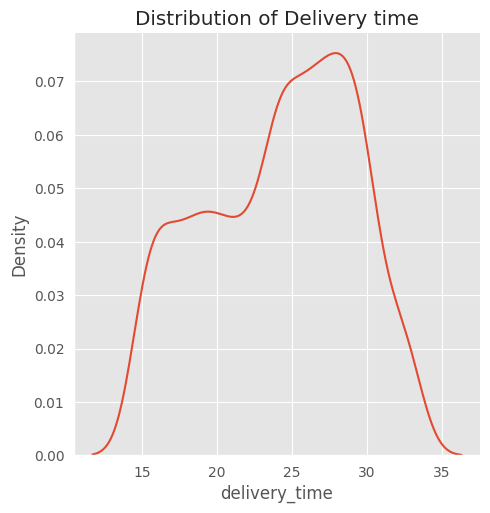

In [ ]:
plt.figure(figsize =(15,6));
sns.displot(data = df, x = 'delivery_time', kind = 'kde')
plt.title('Distribution of Delivery time')
plt.show()

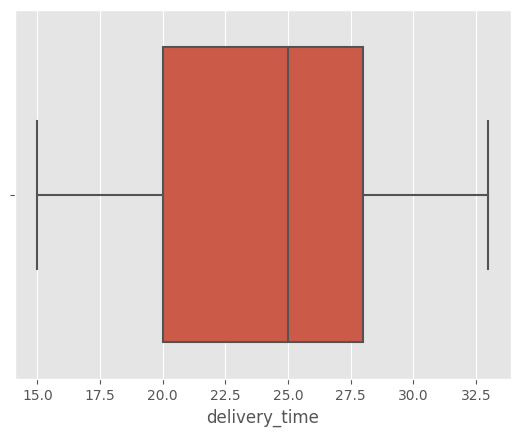

In [ ]:
sns.boxplot(data = df, x='delivery_time')
plt.show()

- *Median time of order delivery is 25mins*
- *50% of order delivery time ranges between 20 and 28mins*
- *This explains the left skewedness of the data in the distribution plot*
- *There are no outliers in the data for delivery time*


We have seen the distribution plots for numerical data.Now we will check the distribution of categorical data by using count plots

**Distribution of Restaurants**

####Countplot for restaurants

In [ ]:
####Find the top 20 restaurants based on number of orders
top20_restaurants = df.groupby('restaurant_name')['order_id'].count().sort_values(ascending = False).reset_index().head(20)
top20_restaurants

,restaurant_name,order_id
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68
5,RedFarm Broadway,59
6,RedFarm Hudson,55
7,TAO,49
8,Han Dynasty,46
9,Blue Ribbon Sushi Bar & Grill,44


<Figure size 3000x700 with 0 Axes>

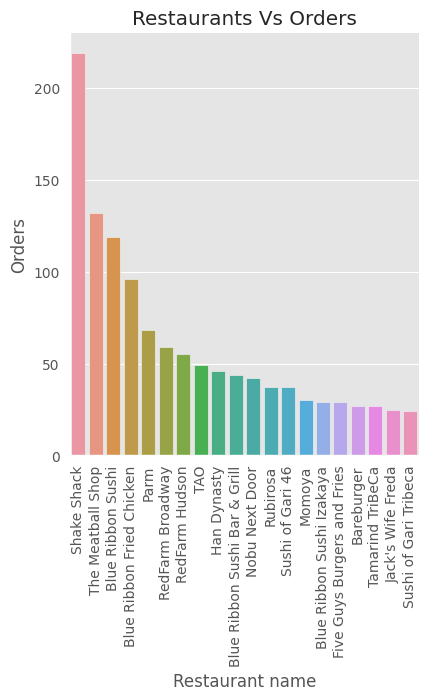

In [ ]:
plt.figure(figsize = (30,7))
sns.catplot(data = top20_restaurants,x='restaurant_name', y= 'order_id',kind = 'bar')
plt.title('Restaurants Vs Orders')
plt.xlabel('Restaurant name')
plt.ylabel('Orders')
plt.xticks(rotation = 90)
plt.show()

- *Only a few restaurants has orders more than 50*
- *The highest number of orders is served by Shake Shack*




#####Lets find how many unique restaurants are available in the dataset

In [ ]:
df['restaurant_name'].nunique()

178

- *There are a total of 178 unique restuarants in the dataset*

Lets find the highest number of orders and least number of orders received

In [ ]:
df.groupby('restaurant_name')['order_id'].count().max()

219

- *The maximum number of orders served by a restaurant is 219*

In [ ]:
df.groupby('restaurant_name')['order_id'].count().min()

1

- *The minimum number of orders served by a restaurant is 1*

####Distribution of different cuisine types

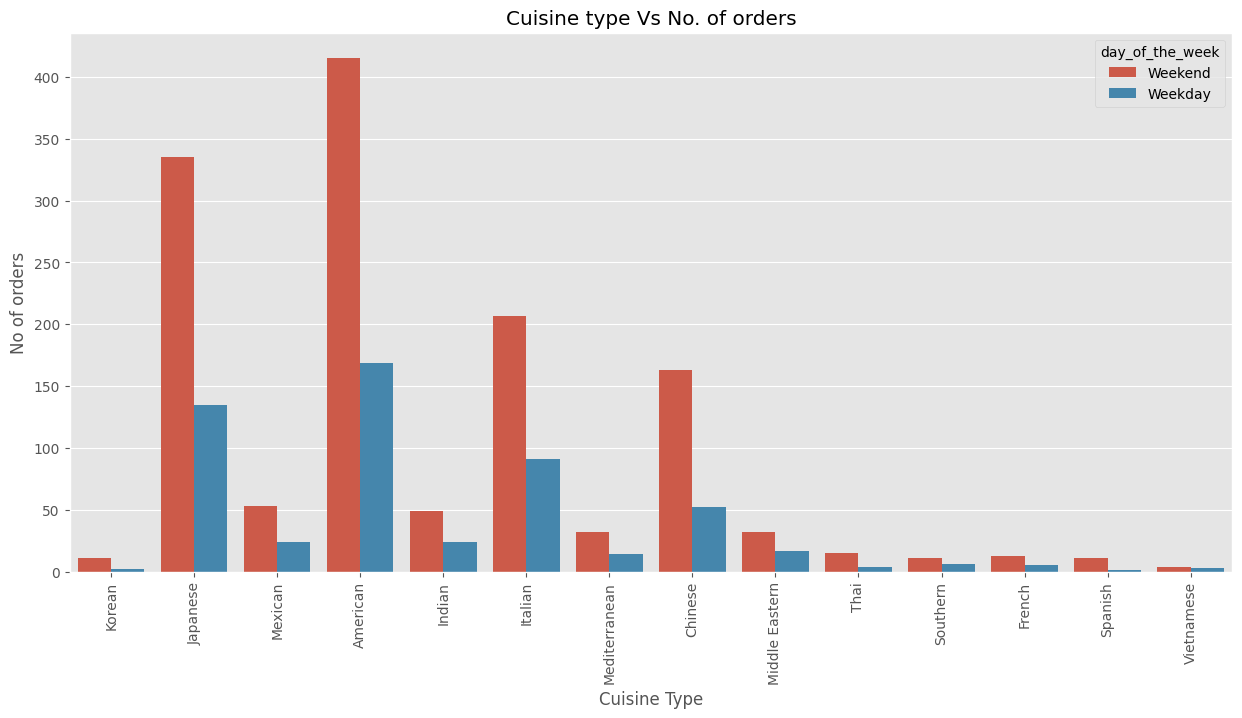

In [ ]:
plt.figure(figsize = (15,7))
sns.countplot(data=df,x = 'cuisine_type',hue = 'day_of_the_week')
plt.xlabel('Cuisine Type')
plt.ylabel('No of orders')
plt.title('Cuisine type Vs No. of orders')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
df['cuisine_type'].value_counts()/df['order_id'].count()*100

American         30.769
Japanese         24.763
Italian          15.701
Chinese          11.328
Mexican           4.057
Indian            3.846
Middle Eastern    2.582
Mediterranean     2.424
Thai              1.001
French            0.948
Southern          0.896
Korean            0.685
Spanish           0.632
Vietnamese        0.369
Name: cuisine_type, dtype: float64

- *All the cuisnes have more orders on weekends*
- *American cuisine has the highest demand and Vietnamese has the lowest demand*
- *Korean, Spanish and Vietnamese have the lowest number of orders*
- *Japanese, Italian and Chinese are also customer favourites*
- *The major contributors in the app are American, Japanese, Italian and Chinese in percentage of orders*


####Distribution of the day of week in which order is made

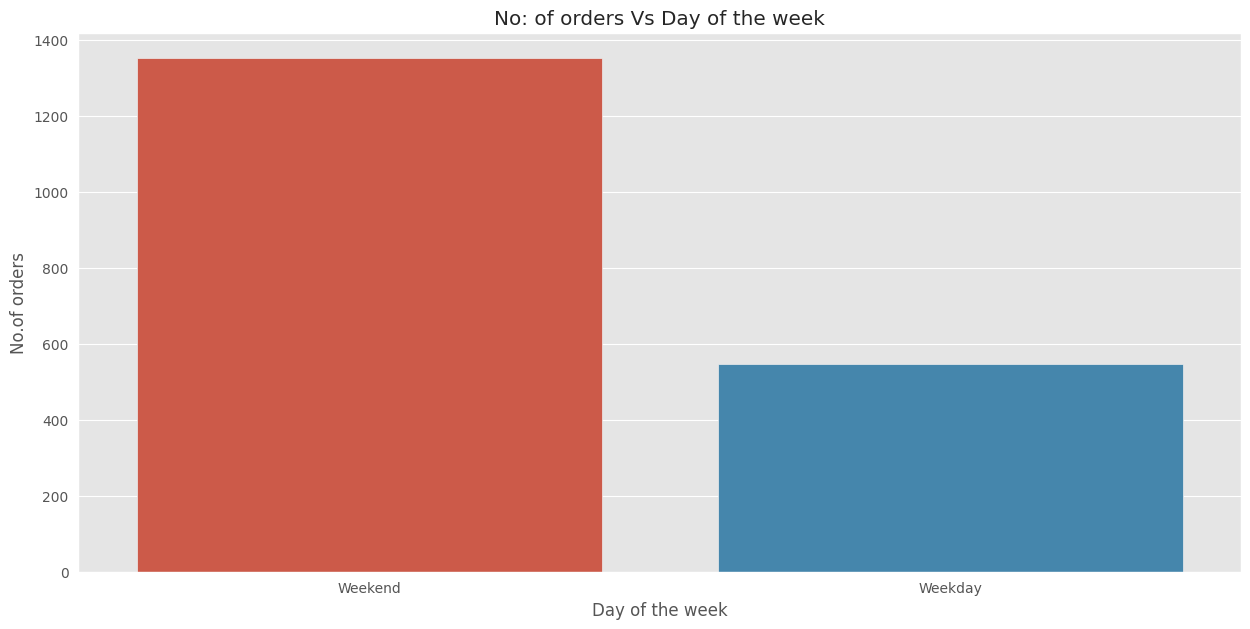

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(data = df, x ='day_of_the_week')
plt.title('No: of orders Vs Day of the week')
plt.xlabel('Day of the week')
plt.ylabel('No.of orders')
plt.show()

- *Majority of orders are made in the weekend*
- *The number of orders on weekends is more than twice those in weekdays*
- *Customers prefer to order more in the weekends than in weekdays*

####Distribution of rating of the customers

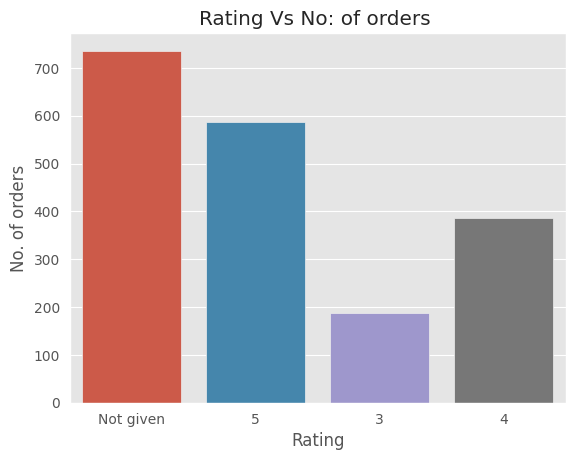

In [ ]:
sns.countplot(data = df, x= 'rating')
plt.title('Rating Vs No: of orders ')
plt.ylabel('No. of orders')
plt.xlabel('Rating')
plt.show()

- *Majority of orders are not given any rating*
- *Orders with a rating of 5 tops the list among those rated*




### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?  [1 mark]

In [ ]:
top5_restaurants =df['restaurant_name'].value_counts().sort_values(ascending = False)
top5_restaurants

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Coppola's East                 1
Kori Restaurant and Bar        1
Woorijip                       1
Crema Restaurante              1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

- *Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken,Parm  are the top 5 restaurants in terms of number of orders received*
- *Only the top 3 restaurants has more than 100 orders*

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]





In [ ]:
df[df['day_of_the_week'] == 'Weekend'].groupby('cuisine_type')['order_id'].count().sort_values(ascending = False).head(5)

cuisine_type
American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: order_id, dtype: int64

- *The most popular cuisine on weekend is American*

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
round(len(df[df['cost_of_the_order'] > 20])/len(df['order_id'])*100,2)

29.24

- *About 29.24% of orders cost more than 20 dollars*

### **Question 10**: What is the mean order delivery time?  [1 mark]

In [ ]:
round(df['delivery_time'].mean(),2)

24.16

- *The average delivery time for an order is 24.16mins*

### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
df.groupby('customer_id')['order_id'].count().sort_values(ascending = False).reset_index().head(5)

,customer_id,order_id
0,52832,13
1,47440,10
2,83287,9
3,250494,8
4,65009,7


- The top 5 customers of the foodhub app who are eligible to receive a 20% discount vouchers are
       52832
       47440
       83287
       250494
       65009

**Multivariate Analysis**

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)  [10 marks]

####Lets see the correlation between numerical variables using a heatmap

In [ ]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

In [ ]:
numeric_col = ['order_id', 'customer_id', 'rating',
       'food_preparation_time', 'delivery_time']

<ipython-input-149-c7864297421b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = df[numeric_col].corr(), annot = True, cmap = 'YlGnBu')


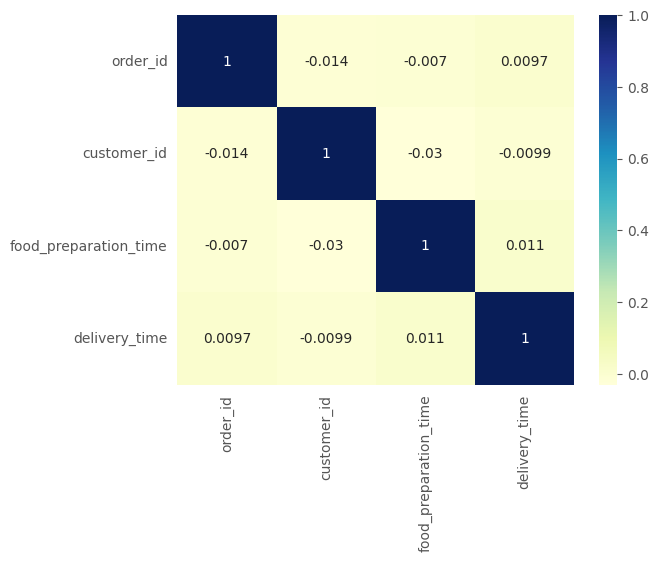

In [ ]:
sns.heatmap(data = df[numeric_col].corr(), annot = True, cmap = 'YlGnBu')
plt.show()


- *There is not much correlation between any of the numerical variables*

####Lets plot a pairplot to check the correlation between all variables

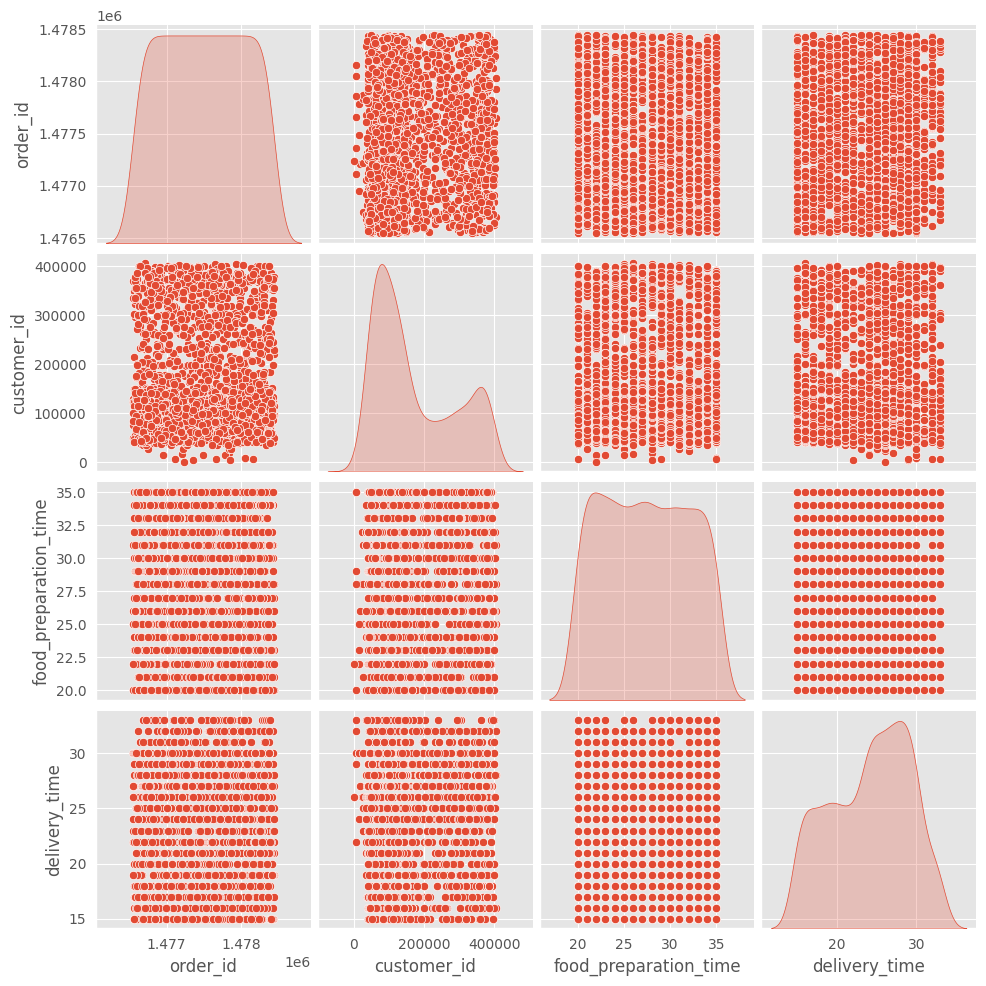

In [ ]:
sns.pairplot(data = df[numeric_col],diag_kind = 'kde' )
plt.show()

####Lets check the dependancy of cuisine type and the cost of the order

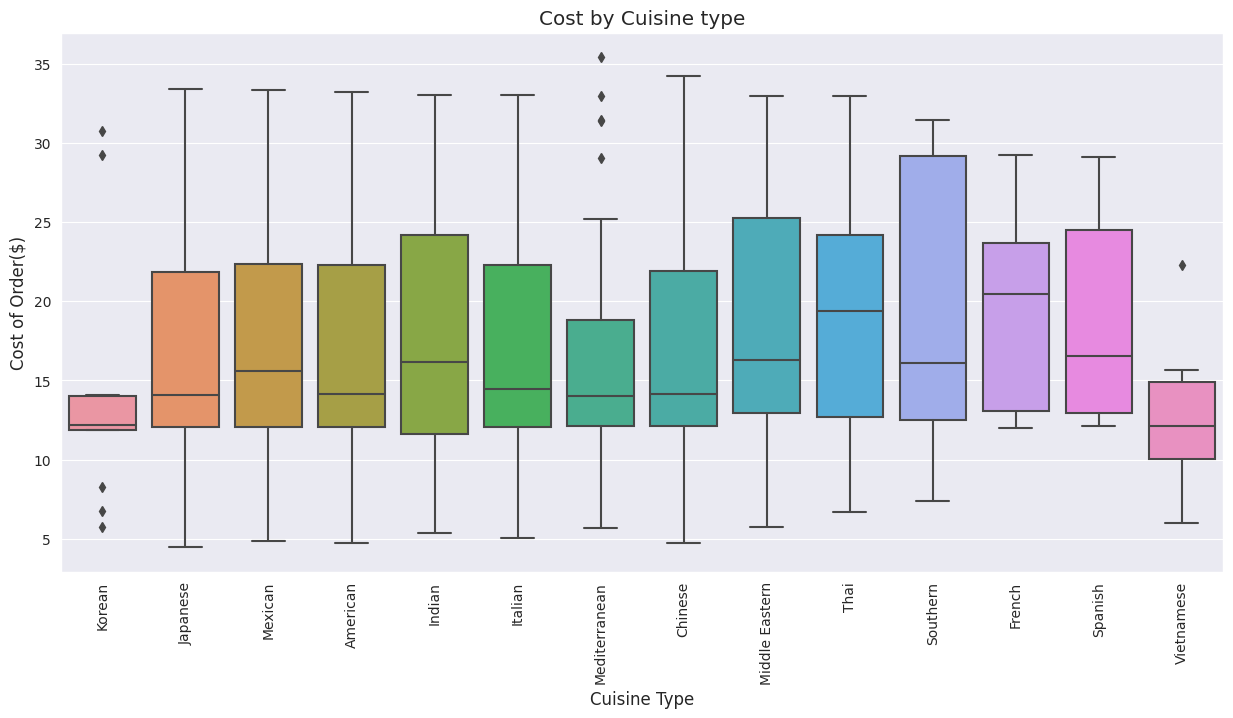

In [ ]:
plt.figure(figsize = (15,7))
sns.set_style('darkgrid')
sns.boxplot(data=df, x='cuisine_type',y='cost_of_the_order')
plt.xticks(rotation = 90)
plt.title('Cost by Cuisine type')
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of Order($)')
plt.show()

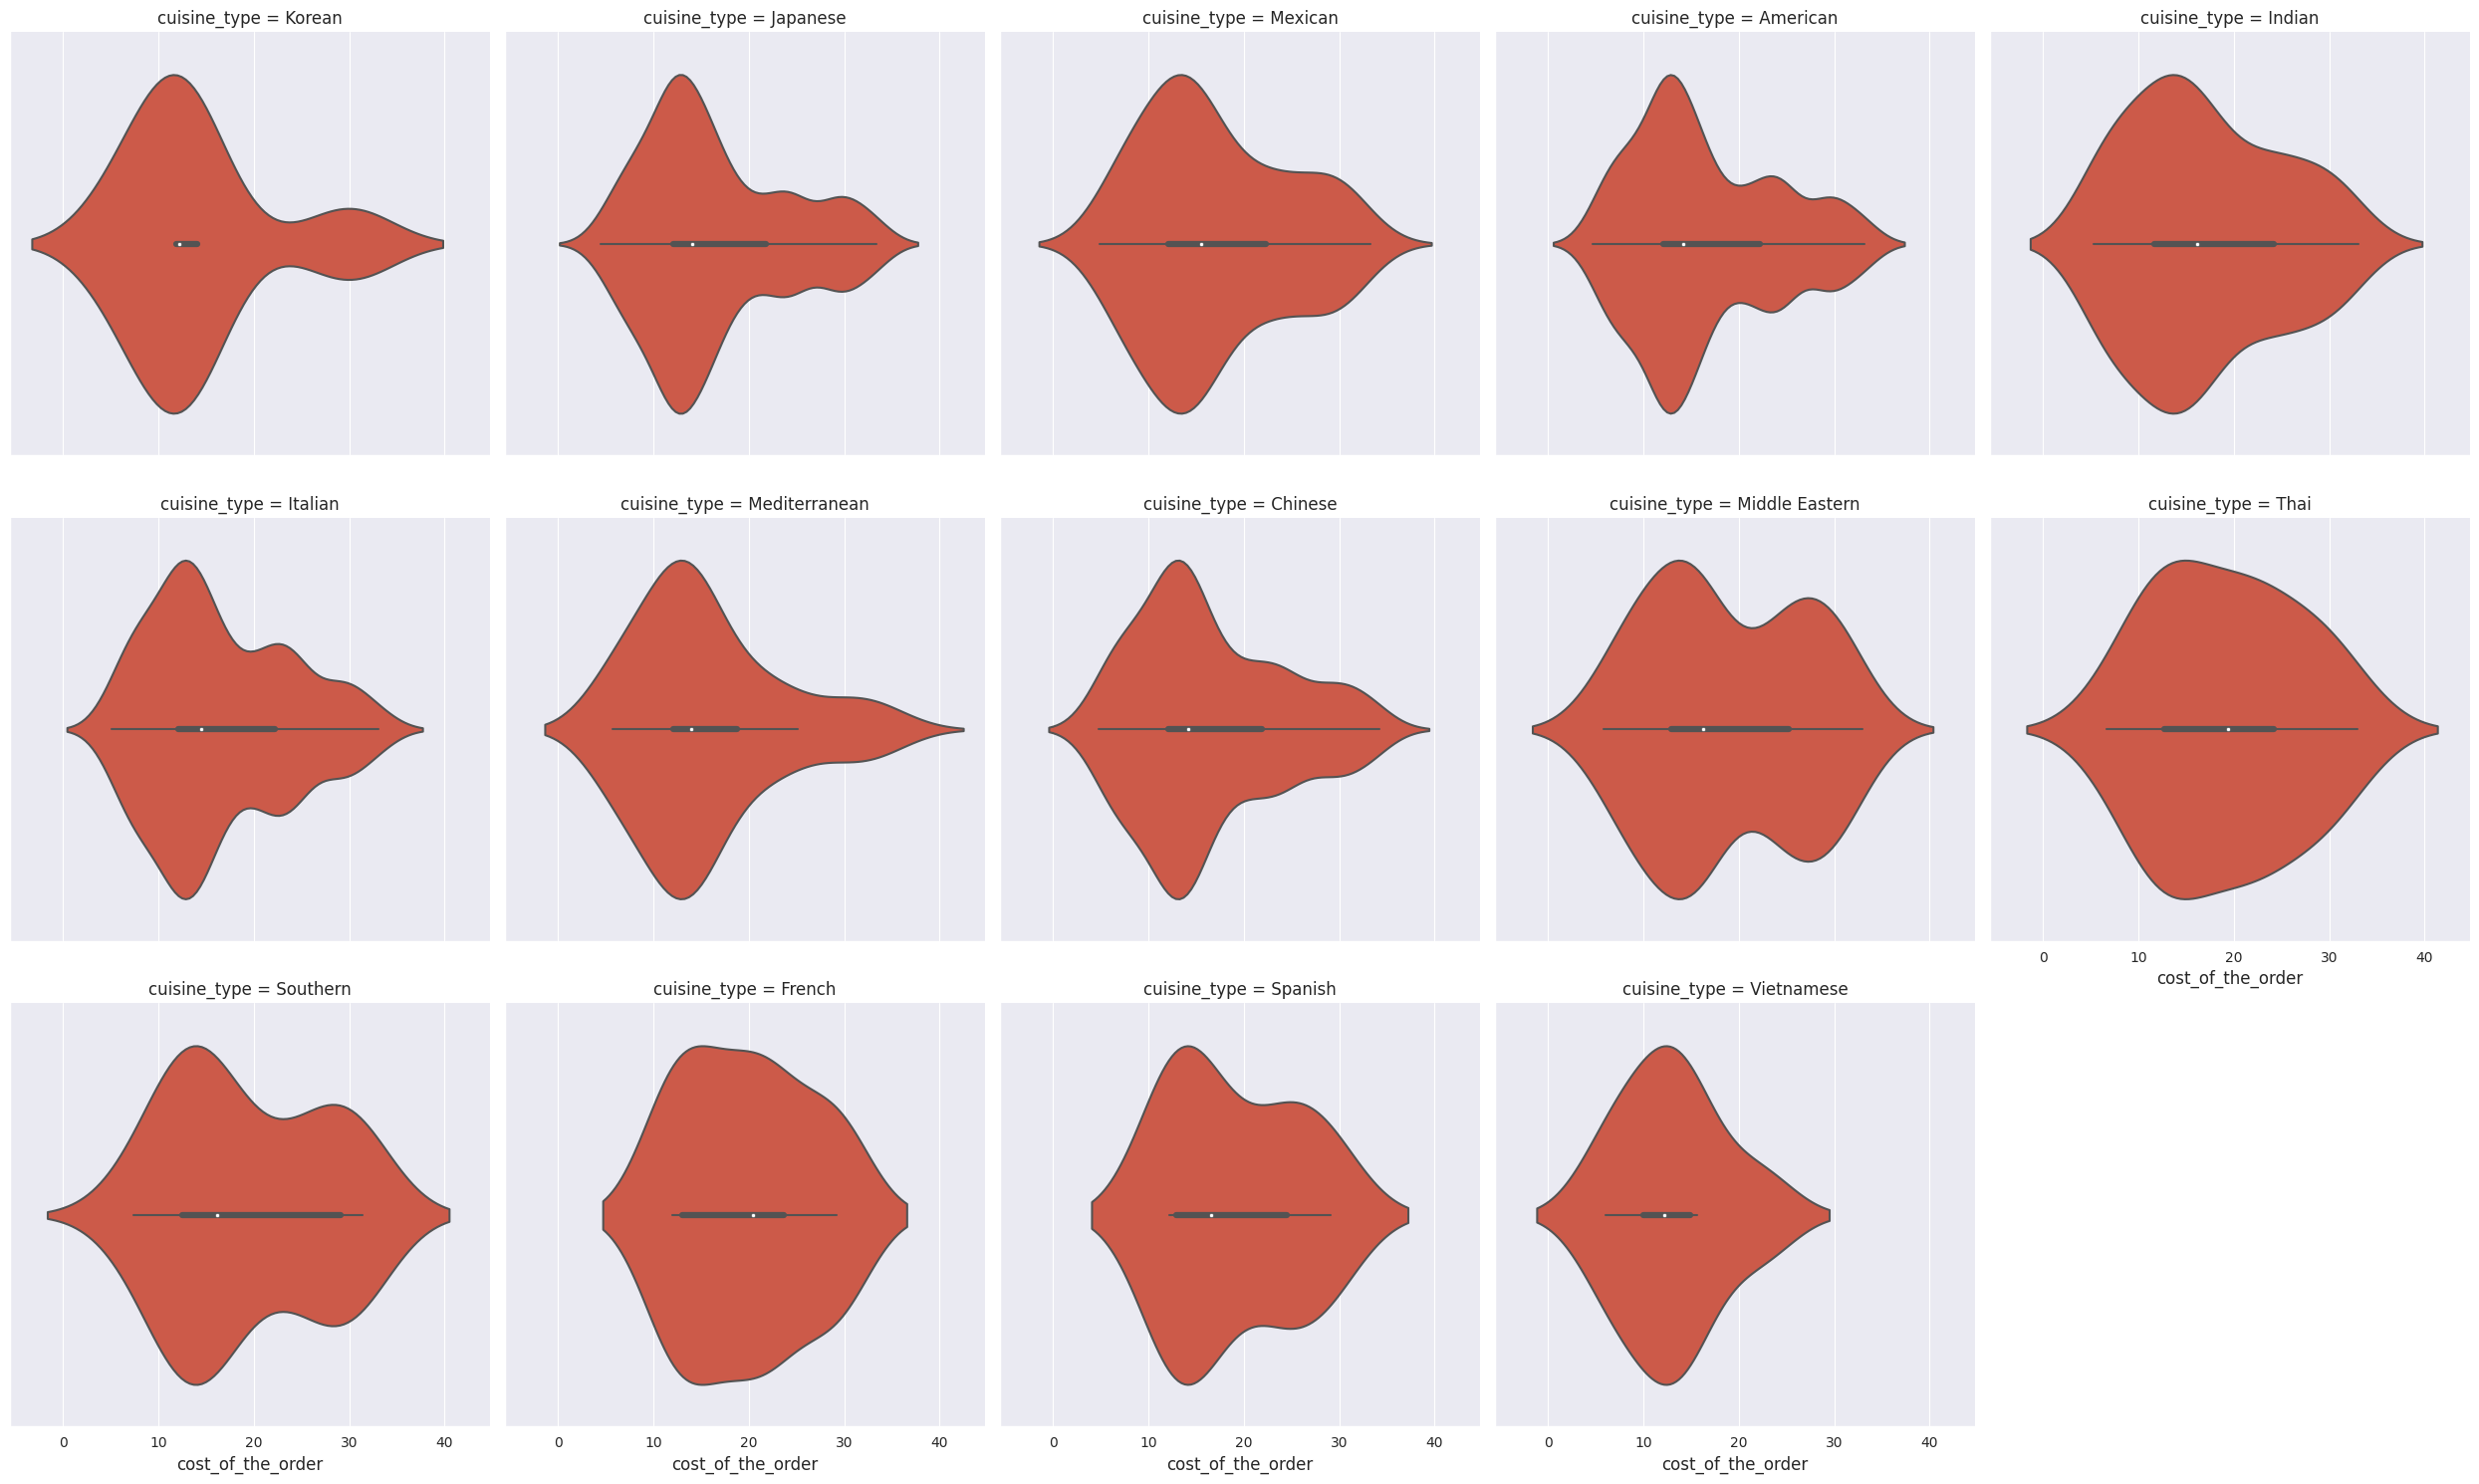

In [ ]:
sns.catplot(data = df, col = 'cuisine_type', x='cost_of_the_order', col_wrap =5, kind = 'violin')
plt.show()

- *All the cuisines except Thai and French has a right skewedness for cost of the orders*
-*Thai and French cuisines have a left skewness in their cost distribution*
- *For Mexican, Indian, Southern, Middle Eastern and Spanish cuisines, atleast 50% of orders have a cost above 16 dollars*
- *For American, Japnese, Italian, Mediteranian, Chinese and Vietnamese, atmost 50% of orders have a cost below 15 dollars*
- *For Japanes, Mexican , Americsn and Chinese there are some very low cost orders that is below 5 dollars*
- *For Korean cuisine, even if 50% of orders are between 12 and 14 dollars, thers are some very low and very high cost orders*
- *For Mediterranian cuisine, there are some very high cost orders above 35 dollars*
- *For Thai and French cuisine, the median value of cost is high as about 19 dollars and 21 dollars respectively which is high compared to respective values of other cuisines*
- *There are some outliers in cost for Korean, Mediterranian and Vietnamese cuisines*



In [ ]:
####Find the percentage of revenue from various cuisines
df.groupby('cuisine_type')['cost_of_the_order'].sum().sort_values(ascending = False)/df['cost_of_the_order'].sum()*100

cuisine_type
American         30.435
Japanese         24.471
Italian          15.624
Chinese          11.195
Mexican           4.164
Indian            3.944
Middle Eastern    2.945
Mediterranean     2.273
Thai              1.165
French            1.138
Southern          1.048
Spanish           0.728
Korean            0.581
Vietnamese        0.288
Name: cost_of_the_order, dtype: float64

- *The main revenue generators are American,Japanese, Italian and Chinese cuisines*
- *The low revenue earning cuisines are Spanish, Korean and Vietnamese which is true as their number of orders are also less*


###Lets see how food preperation time varies over various cuisines

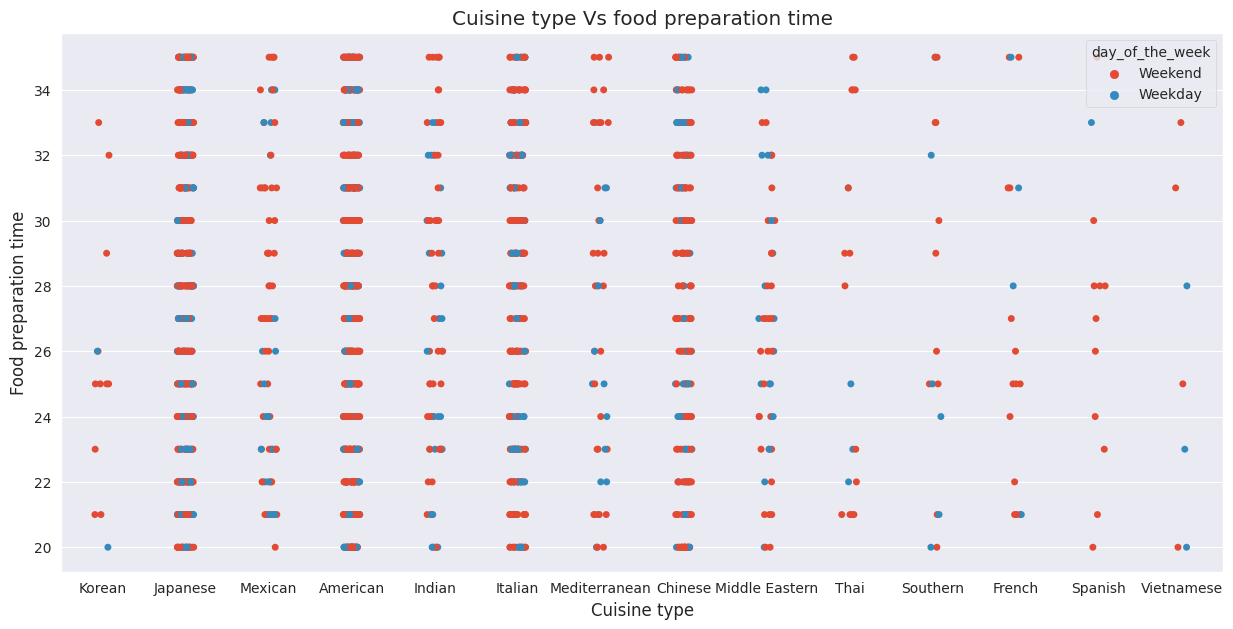

In [ ]:
plt.figure(figsize=(15,7))
sns.stripplot(data = df, x = 'cuisine_type', y = 'food_preparation_time' ,hue = 'day_of_the_week')
plt.title('Cuisine type Vs food preparation time')
plt.xlabel("Cuisine type")
plt.ylabel('Food preparation time')
plt.show()

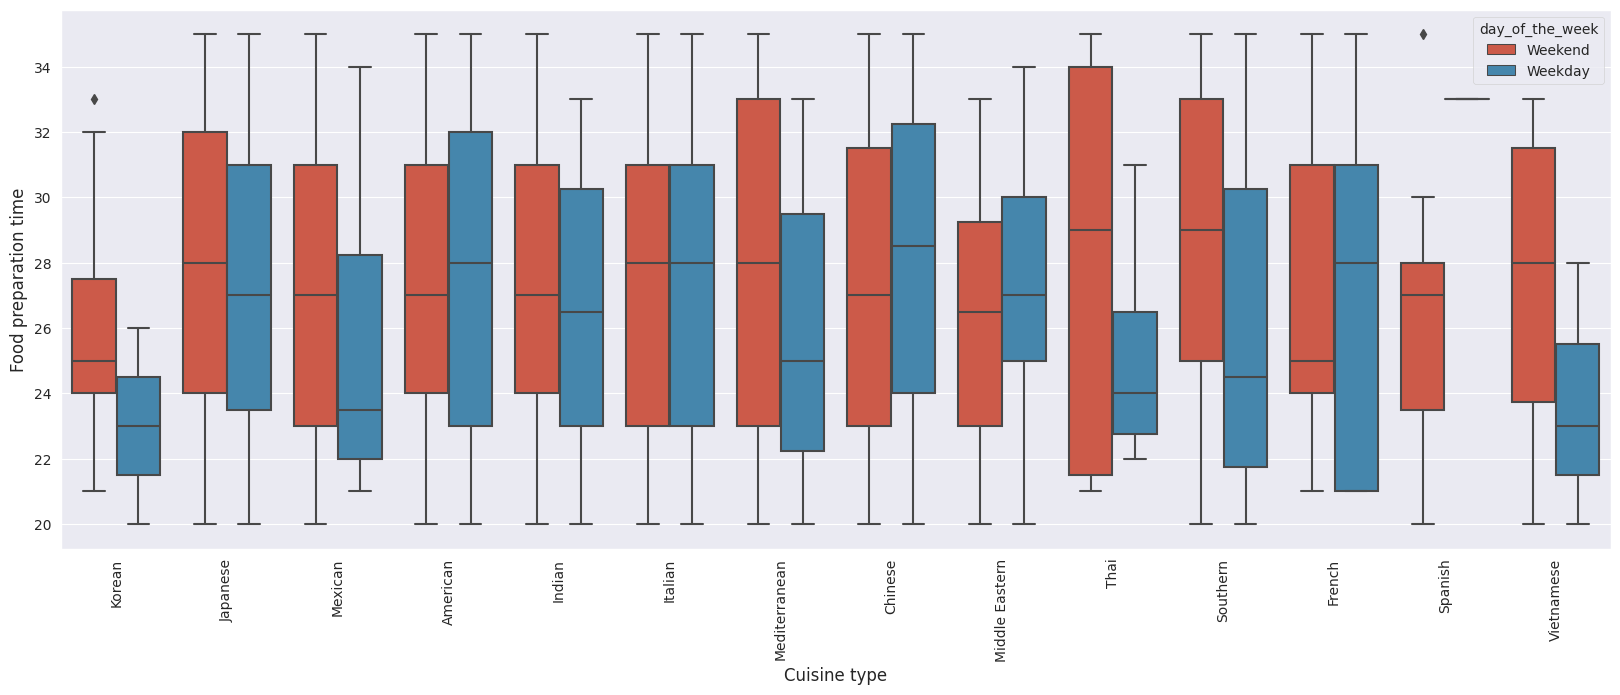

In [ ]:
plt.figure(figsize = (20,7))
sns.boxplot(data = df, x = 'cuisine_type', y='food_preparation_time',hue = 'day_of_the_week')
plt.xticks(rotation = 90)
plt.xlabel("Cuisine type")
plt.ylabel('Food preparation time')
plt.show()

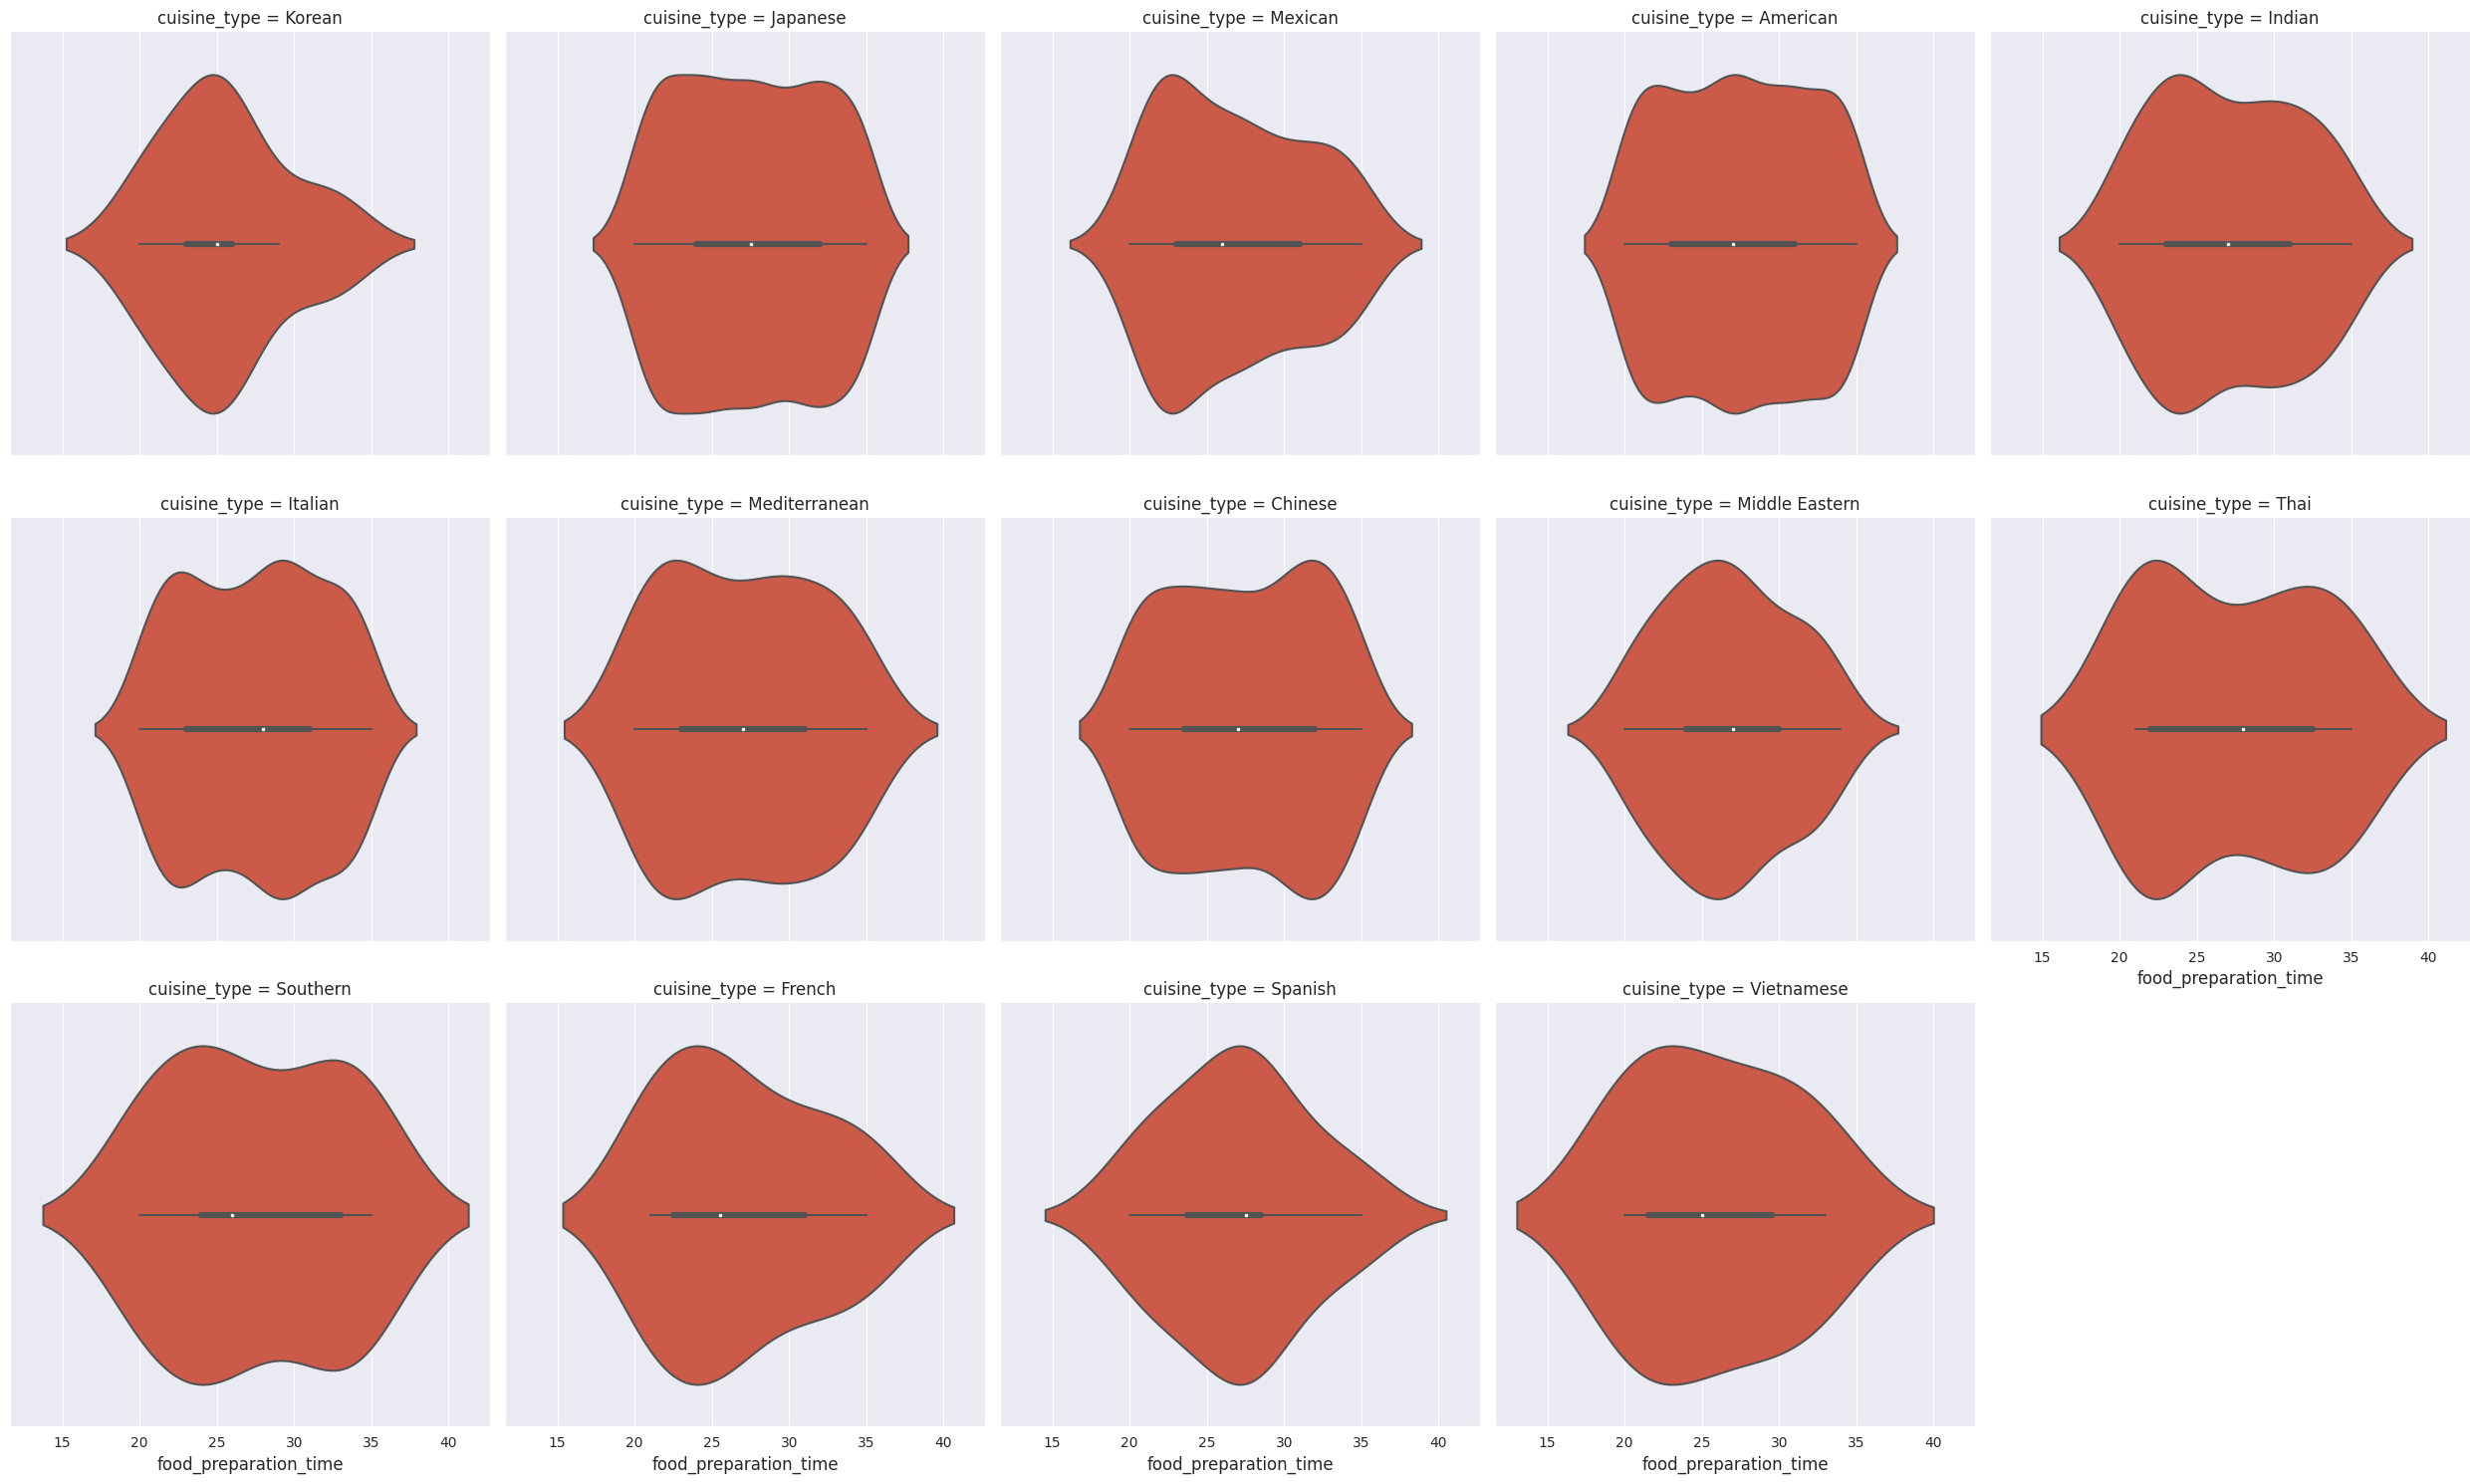

In [ ]:
sns.catplot(data=df, x='food_preparation_time',col = 'cuisine_type',col_wrap = 5, kind = 'violin')
plt.show()

- *Food preperation time varies from 20 to 35 mins on both weekdays and weekends*
- *Most of the cuisines have 50% of the orders prepared at a lesser time on weekdays as compared to weekends.This could be due to the lesser number of orders on weekdays*
- *Italian cuisine has the same distribution of food preperation time for both weekdays and weekends*
- *American, Chinese, Middle Eastern and French have 50% of orders prepared at a lesser time on weekends*
- *Food preperation time for Thai cuisine have a huge spread on weekends that ranges from 21 to 34 mins and 50% of their orders takes a preperation time of atmost 29 mins which is the largest as compared to all other cuisine types*
- *Korean and Spanish cuisines have some outliers in the food preperation time*
- *Thai and Italian have a left skewed distribution for the food preperation time*


####Lets visualize the delivery time for different cuisines

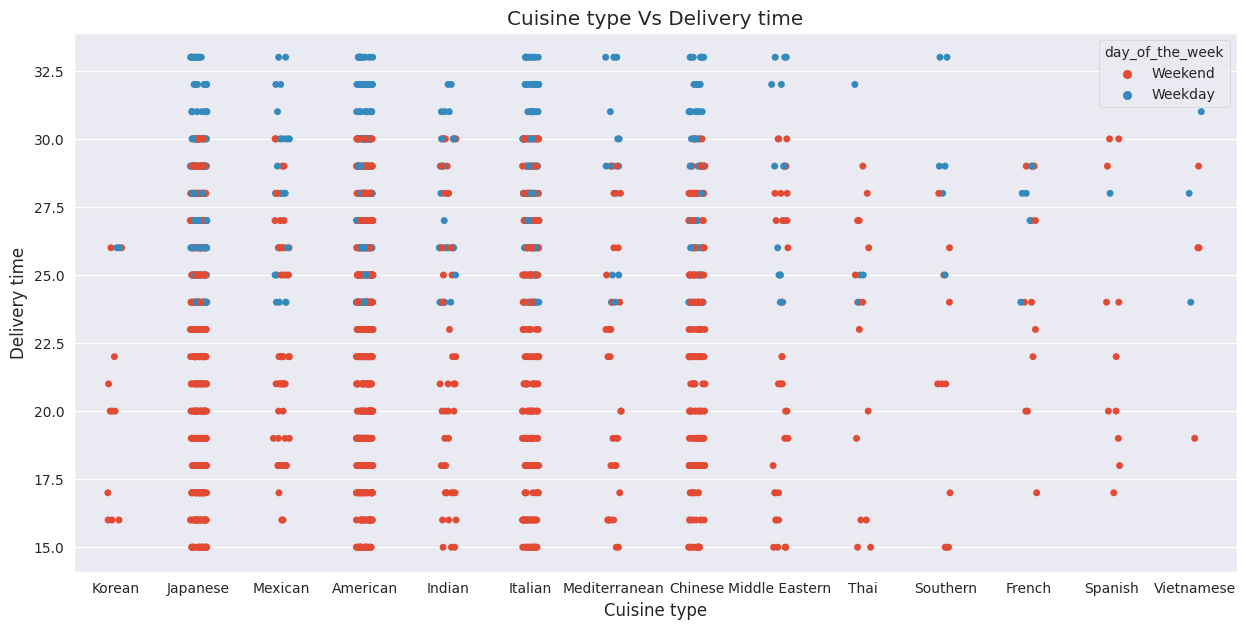

In [ ]:
plt.figure(figsize=(15,7))
sns.stripplot(data= df, x = 'cuisine_type', y = 'delivery_time', hue='day_of_the_week', jitter = True)
plt.title('Cuisine type Vs Delivery time')
plt.xlabel('Cuisine type')
plt.ylabel('Delivery time')
plt.show()

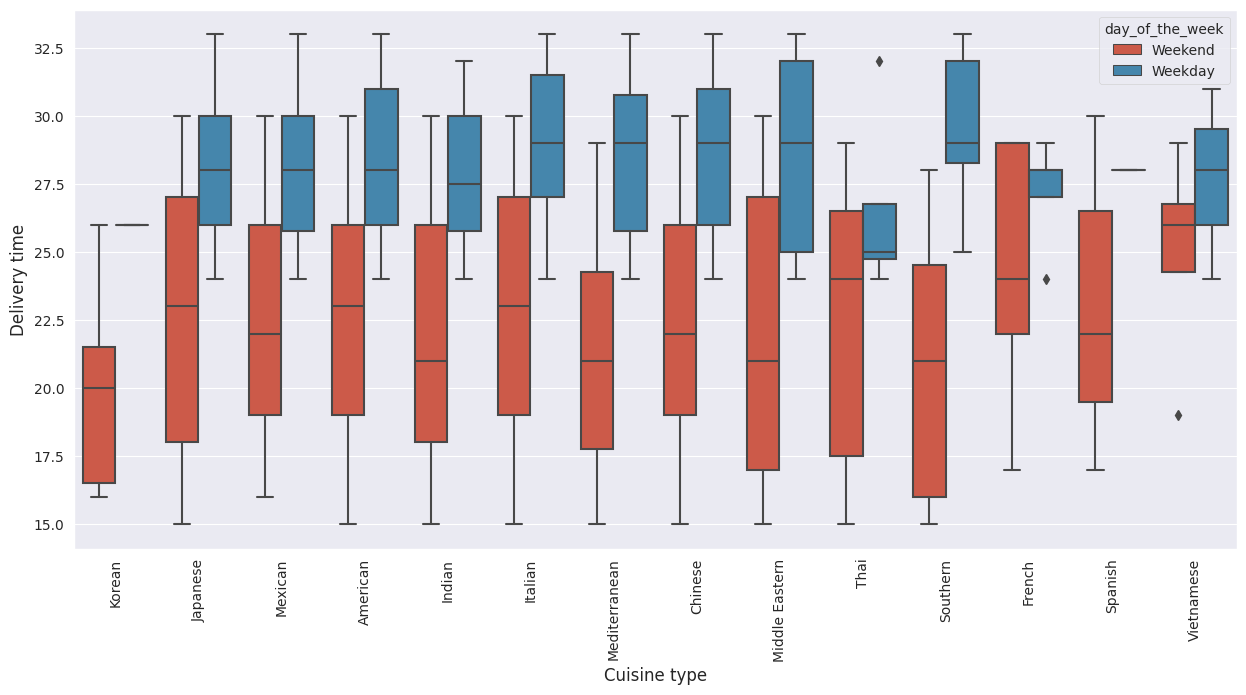

In [ ]:
plt.figure(figsize = (15,7))
sns.boxplot(data = df, x = 'cuisine_type', y='delivery_time',hue = 'day_of_the_week')
plt.xticks(rotation = 90)
plt.xlabel('Cuisine type')
plt.ylabel('Delivery time')
plt.show()

<Figure size 1500x700 with 0 Axes>

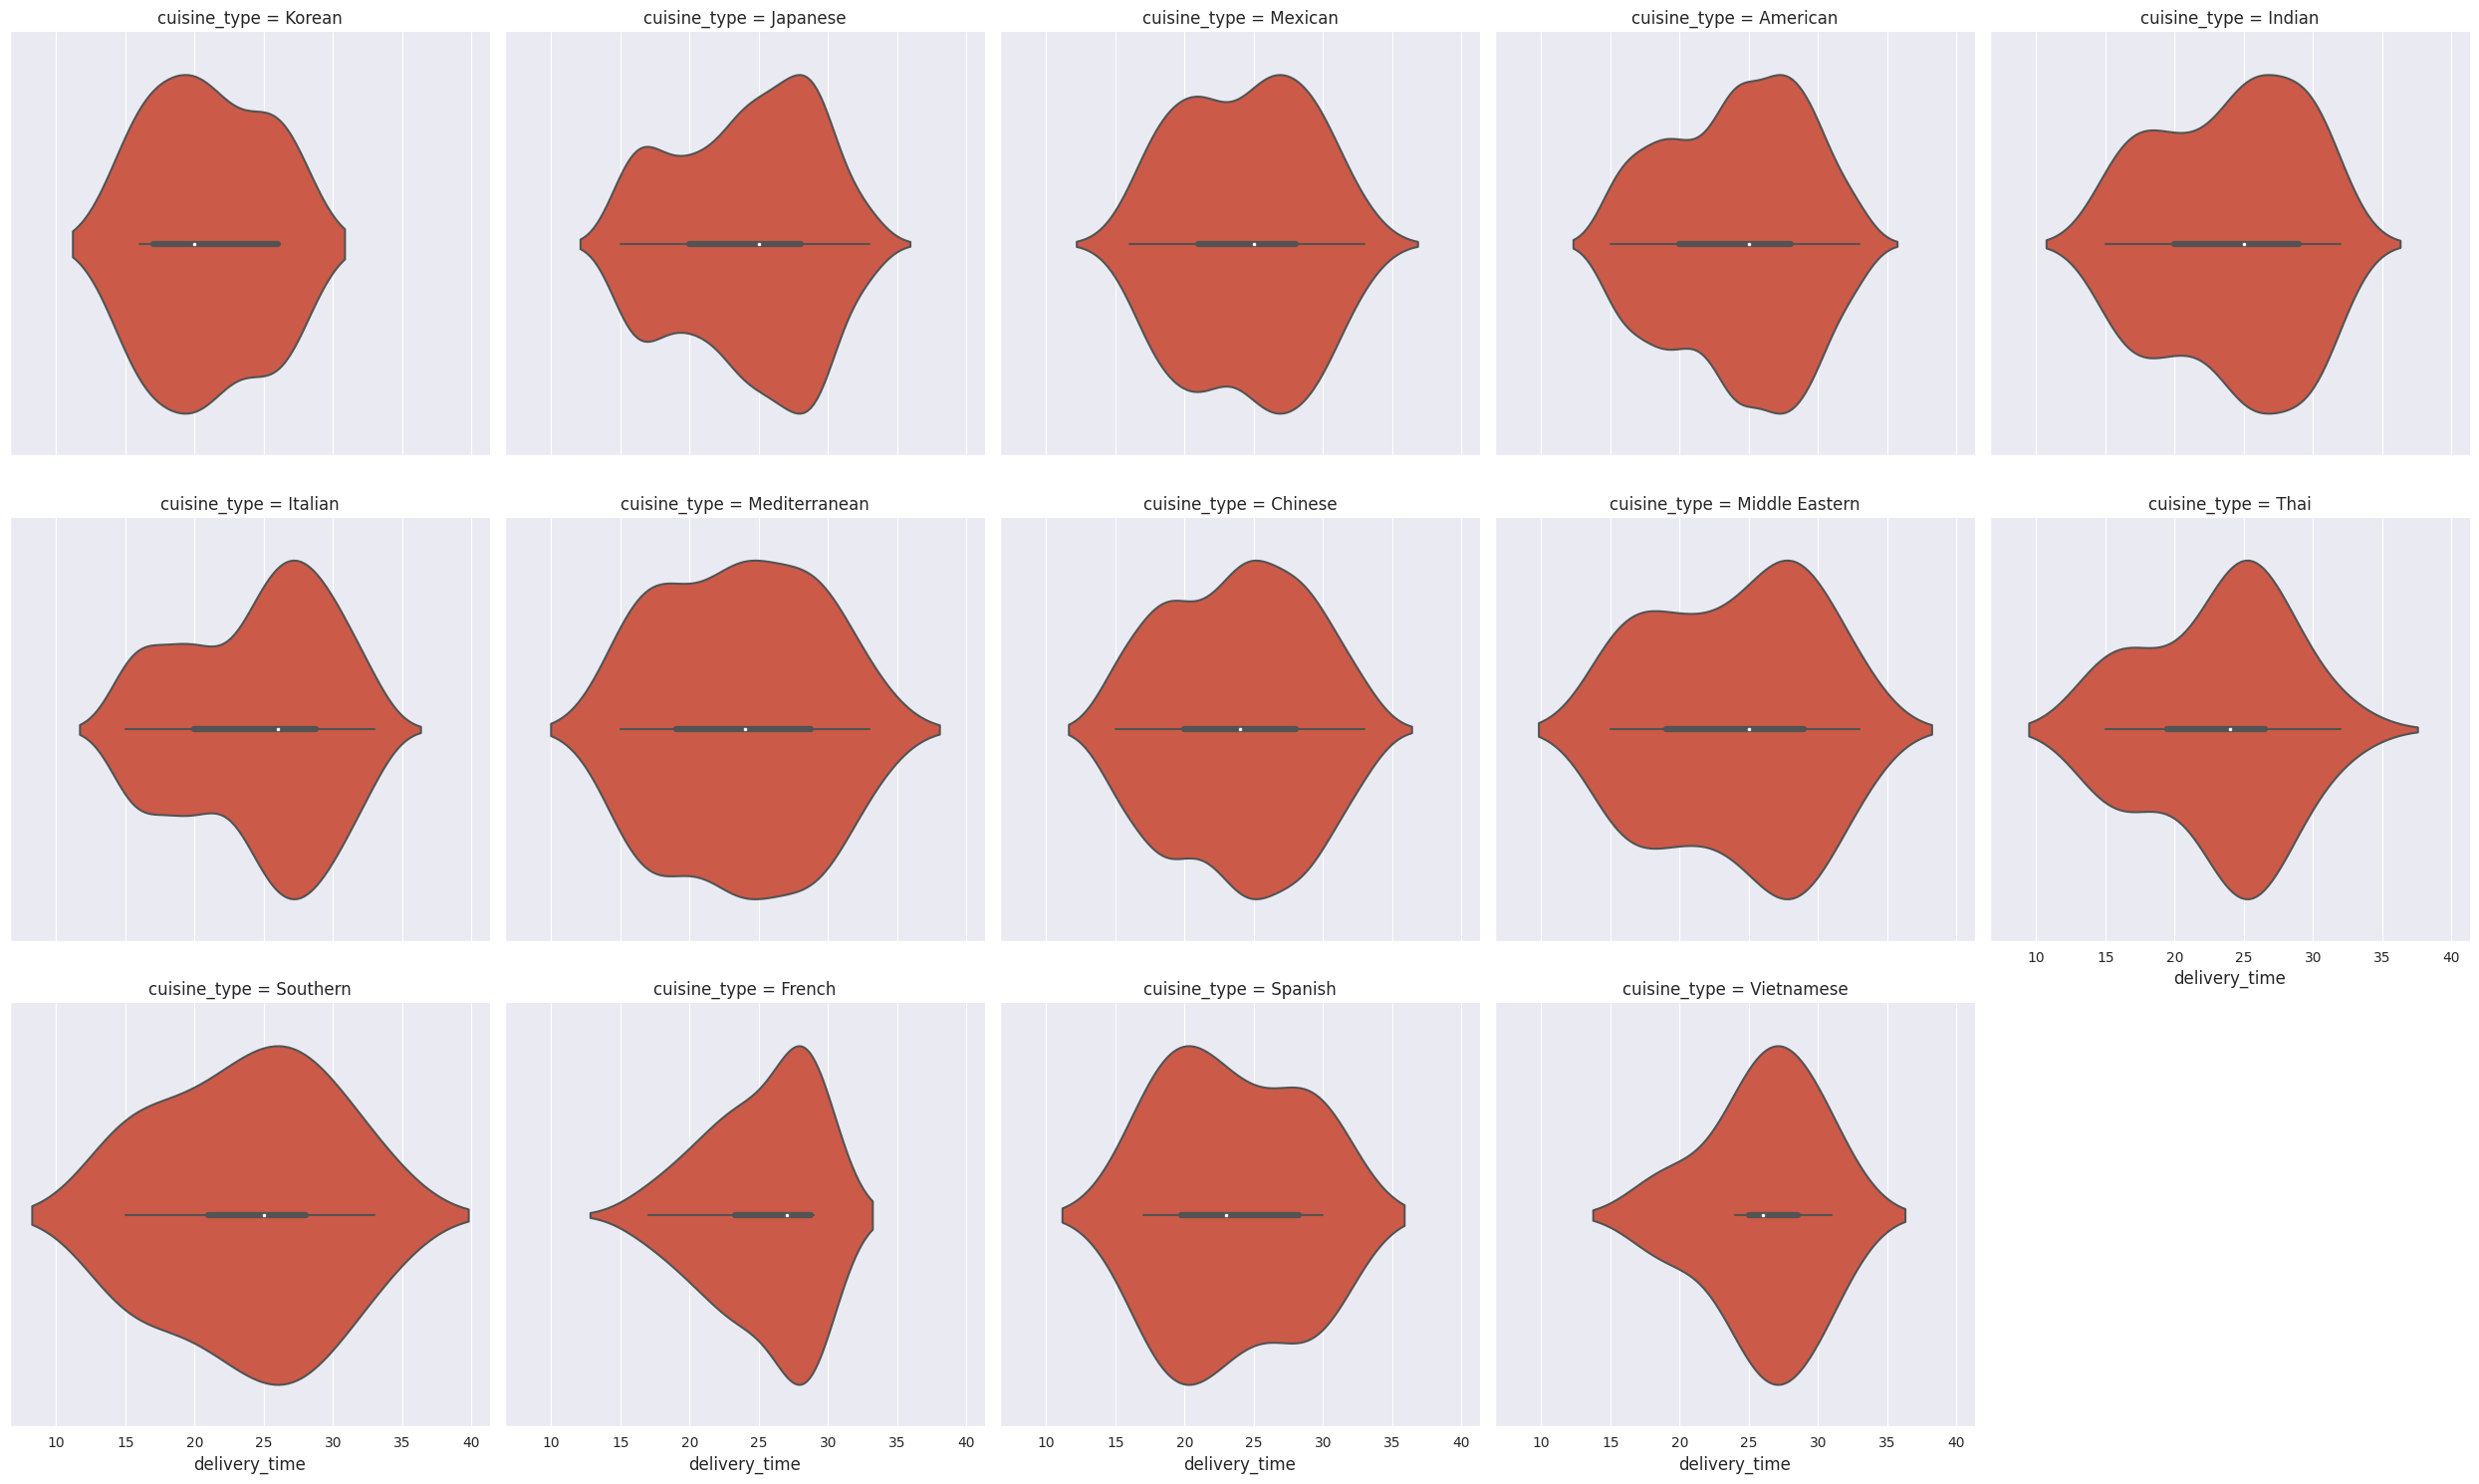

In [ ]:
plt.figure(figsize = (15,7))
sns.catplot(data=df, x='delivery_time',col = 'cuisine_type',col_wrap = 5, kind = 'violin')
plt.show()

- *There is a significant difference in delivery time during weekdays and weekends*
- *The delivery time during weekends ranges from 15 to 30 mins while on weekdays it ranges from 24 to 33 mins.Hence in general it takes more time to deliver the order on weekdays*
- *For most of the cuisines, the minimum delivery time on weekdays is 24 mins while on weekends, atleast 50% of orders of these cuisines are delivered within 24mins.
- *French and Vietnamese cuisines have a comparatively higher delivery time than any other cuisines for 75% of their orders on weekends*
- *For Thai and French cuisine 50% of the orders are deivered within 24 mins on weekends while other cuisines have a smaller median value.on these days*
- *All the cuisines have a left skewed distribution for delivery time except for Korean and Spanish cuisines.This indicates that for all these cuisines with left skewedness, there are some orders that are deivered in a very short time eventhough majority of orders takes time above 16 min *

####Let's visualize the how cost of order is distributed across weekdays and weekends

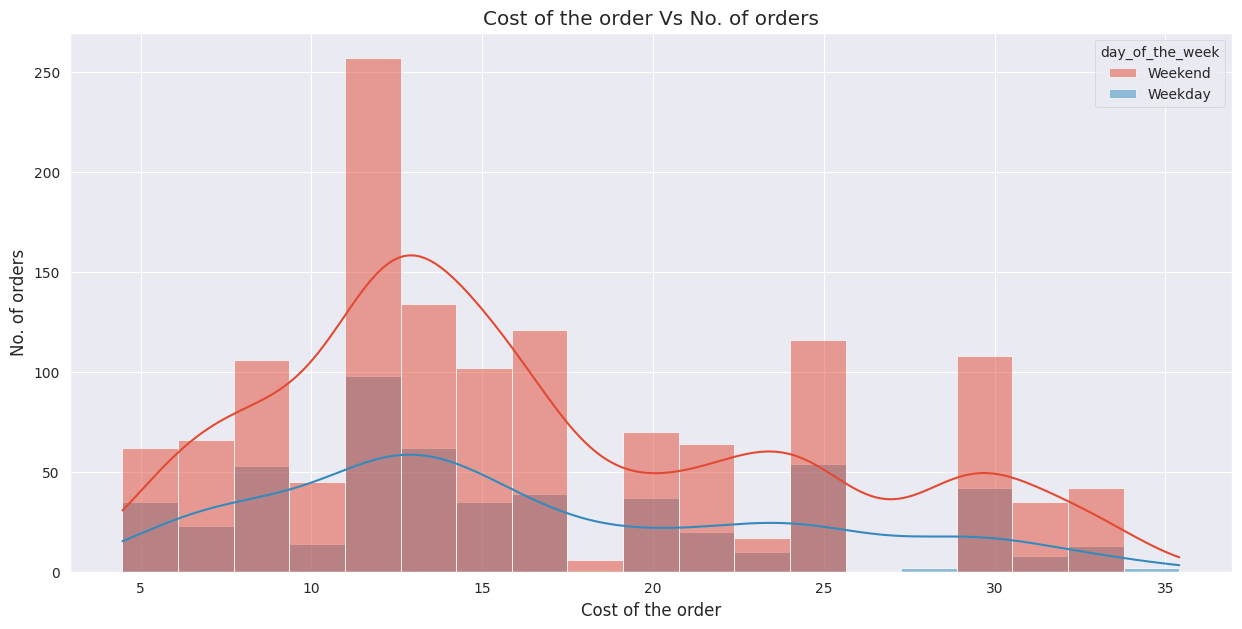

In [ ]:
plt.figure(figsize = (15,7))
sns.histplot(data = df, x= 'cost_of_the_order', kde = 'True', hue = 'day_of_the_week')
plt.title('Cost of the order Vs No. of orders')
plt.xlabel('Cost of the order')
plt.ylabel('No. of orders')
plt.show()

- *The number of orders are quite high on weekends as compared to weekends*
- *Majority of orders are in the range of 12 to 15 dollars*
- *There is a significant increase in orders around 25 dollars and 30 dollars especially on weekends ie., There are some high cost orders on weekends*

####Lets see the relationship how cost of order and food preperation time varies

<Figure size 1500x700 with 0 Axes>

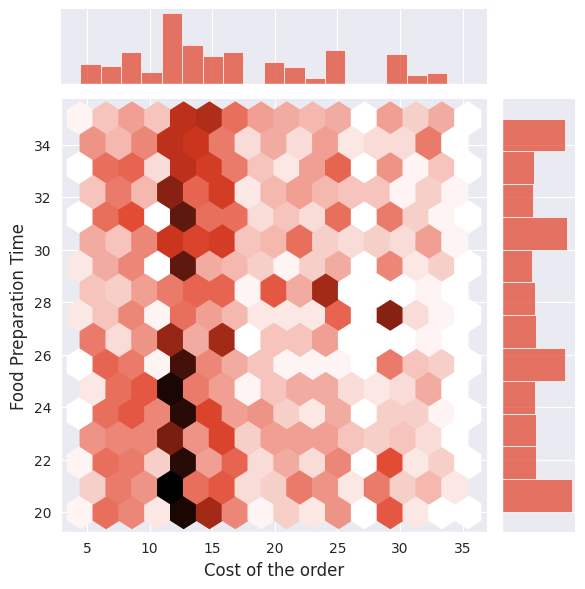

In [ ]:
plt.figure(figsize = (15,7))
sns.jointplot(data =df, x= 'cost_of_the_order', y = 'food_preparation_time',kind = 'hex')
plt.ylabel('Food Preparation Time')
plt.xlabel('Cost of the order')
plt.show()

- *Most of the orders have a cost between 10 and 15 dollars and they have a food preparation time of 20 to 27 mins or 29 to 34 mins*

####Let's visualize the cost of order and delivery time

<Figure size 1500x700 with 0 Axes>

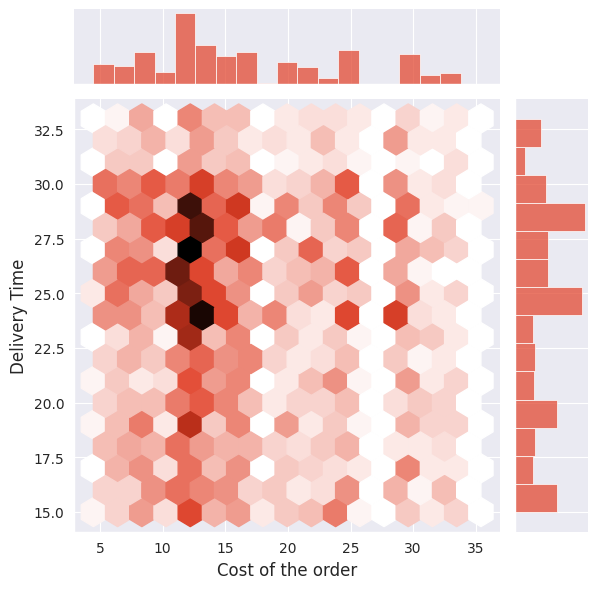

In [ ]:
plt.figure(figsize = (15,7))
sns.jointplot(data =df, x= 'cost_of_the_order', y = 'delivery_time',kind = 'hex')
plt.ylabel('Delivery Time')
plt.xlabel('Cost of the order')
plt.show()

- *Most of the orders have a cost between 10 and 15 dollars and they have a delivery time of 22.5 to 29 mins*

####Let's check how average good preperation time varies over the cuisines

Text(0, 0.5, 'AVerage Food Preparation Time')

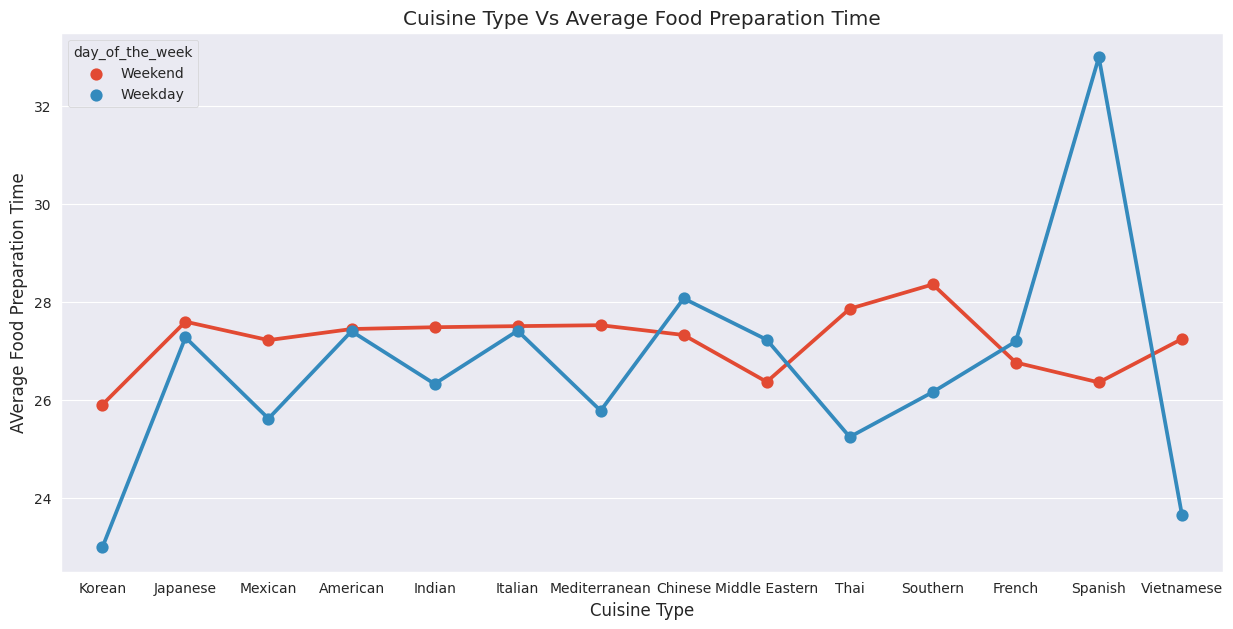

In [ ]:
plt.figure(figsize = (15,7))
sns.pointplot(data= df, x='cuisine_type', y='food_preparation_time',hue='day_of_the_week',estimator = np.average ,errorbar = None)
plt.title('Cuisine Type Vs Average Food Preparation Time')
plt.xlabel('Cuisine Type')
plt.ylabel('AVerage Food Preparation Time')

- *Chinese and Spanish cuisines have lesser average food preperation time on weekends than weekdays*
- *The greater average food preperation time for Spanish cuisine on weekday is explained by the outlier*
- *All other cuisines have lesser average food preperation time on weekdays which makes sense as there are less number of orders*


In [ ]:
#Check the number of orders for Chinese cuisine on weekends and weekdays
df[df['cuisine_type'] =='Chinese']['day_of_the_week'].value_counts()

Weekend    163
Weekday     52
Name: day_of_the_week, dtype: int64

- *Orders are still higher on weekends for Chinese cuisine*
- *Greater average food preperation time might be due to some large orders on weekdays*

####Let's see how average delivery time varies over cuisines

Text(0, 0.5, 'AVerage Delivery Time')

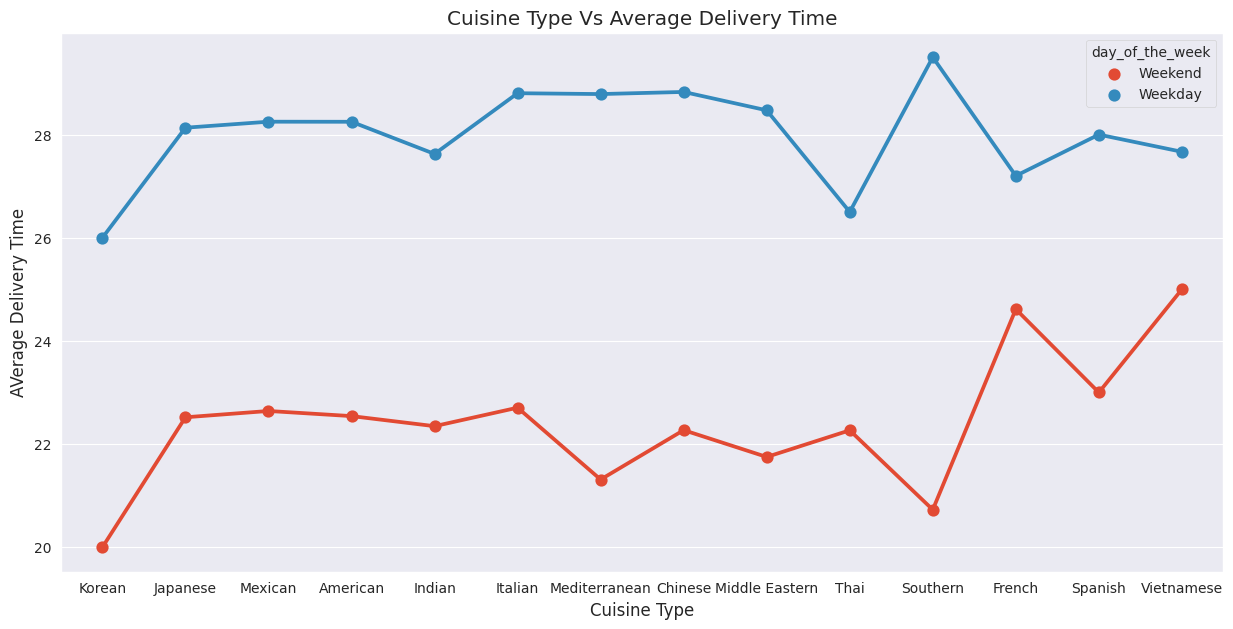

In [ ]:
plt.figure(figsize = (15,7))
sns.pointplot(data= df, x='cuisine_type', y='delivery_time',hue='day_of_the_week',estimator = np.average ,errorbar = None)
plt.title('Cuisine Type Vs Average Delivery Time')
plt.xlabel('Cuisine Type')
plt.ylabel('AVerage Delivery Time')

- *The average delivery time is greater on weekdays for all cuisines*

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

####To calculate the average rating, 'Not given' values needs to be converted to null values and the rating column need to be converted to float type.

In [ ]:
####Convert the 'Not given' rating to null values
df['rating'].replace('Not given', np.nan,inplace = True)

In [ ]:
####Convert the rating column to float type
df['rating'] = df['rating'].astype(dtype = 'float64', errors = 'ignore')

In [ ]:
df['rating'].isnull().sum()

736

- *There are 736 null values for rating*

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


- *The rating is now float type and there are 1162 non null values. Rest 736 are null values*

####Now group the restaurants based on their average rating

In [ ]:
####Create a dataframe with restaurant name and their average rating
df.groupby('restaurant_name')['rating'].mean().sort_values(ascending = False).reset_index()


,restaurant_name,rating
0,'wichcraft,5.000
1,Ravagh Persian Grill,5.000
2,Chola Eclectic Indian Cuisine,5.000
3,Chote Nawab,5.000
4,Junoon,5.000
...,...,...
173,Rohm Thai,NaN
174,Room Service,NaN
175,Spice Thai,NaN
176,Tarallucci e Vino Restaurant,NaN


In [ ]:
####Check the first 5 rows of the dataframe  to veriy the change
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,NaN,25,23
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5.000,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3.000,25,15
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4.000,25,24


In [ ]:
####Let's create a new data frame with restaurant names and number of ratings
df_rating_count = df.groupby('restaurant_name')['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [ ]:
####Rename the rating column to rating_count
df_rating_count.rename(columns = {'rating':'rating_count'},inplace=True)
df_rating_count.head()

,restaurant_name,rating_count
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [ ]:
####Create a dataframe with restaurant name and their average rating
df_avg_rating = df.groupby('restaurant_name')['rating'].mean().sort_values(ascending = False).reset_index()
df_avg_rating.head()

,restaurant_name,rating
0,'wichcraft,5.000
1,Ravagh Persian Grill,5.000
2,Chola Eclectic Indian Cuisine,5.000
3,Chote Nawab,5.000
4,Junoon,5.000


In [ ]:
####Rename the rating column to avg_rating
df_avg_rating.rename(columns = {'rating': 'avg_rating'},inplace = True)
df_avg_rating.head()

,restaurant_name,avg_rating
0,'wichcraft,5.000
1,Ravagh Persian Grill,5.000
2,Chola Eclectic Indian Cuisine,5.000
3,Chote Nawab,5.000
4,Junoon,5.000


In [ ]:
####Merge the df_rating_count and df_avg_rating column to a new data frame df_merge
df_merge = df_rating_count.merge(df_avg_rating, how = 'inner', on = 'restaurant_name')
df_merge

,restaurant_name,rating_count,avg_rating
0,Shake Shack,133,4.278
1,The Meatball Shop,84,4.512
2,Blue Ribbon Sushi,73,4.219
3,Blue Ribbon Fried Chicken,64,4.328
4,RedFarm Broadway,41,4.244
...,...,...,...
173,Market Table,0,NaN
174,Paul & Jimmy's,0,NaN
175,Room Service,0,NaN
176,Rohm Thai,0,NaN


####Lets find the restaurants with rating count >50 and avg. rating >4

In [ ]:
df_merge.loc[(df_merge['rating_count']>50) & (df_merge['avg_rating']>4)]

,restaurant_name,rating_count,avg_rating
0,Shake Shack,133,4.278
1,The Meatball Shop,84,4.512
2,Blue Ribbon Sushi,73,4.219
3,Blue Ribbon Fried Chicken,64,4.328


- *Thre are 4 restaurants that have number of ratings more than 50 and average rating greater than 4*
- *FoodHub company should provide promotional offers in the advertisments for Shake Shack, The Meatball Shop, Blue Ribbon Sushi and Blue Ribbon Fried Chicken*

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
#Calculate the net revenue
Net_revenue = (df[df['cost_of_the_order']>20]['cost_of_the_order']*0.25).sum() + (df[(df['cost_of_the_order']>5) & (df['cost_of_the_order']<20)] ['cost_of_the_order']*0.15).sum()
Net_revenue

6166.303

- *The net revenue of Foodhub Company is 6166.303 dollars*

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
#Calculate the total delivery time by adding food preparation time and delivery time
df['total_delivery_time']=df['food_preparation_time']+ df['delivery_time']
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_delivery_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,NaN,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,NaN,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5.000,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3.000,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4.000,25,24,49


####Lets find the percentage of orders with total delivery time > 60 min

In [ ]:
df[df['total_delivery_time']>60]['order_id'].count()/df['order_id'].count()*100

10.537407797681771

- *10.54% of orders take more than 60 mins to deliver the food once the order is placed*

In [ ]:
####Find the percentage of orders > 60 min for each cuisine
df[df['total_delivery_time']>60]['cuisine_type'].value_counts(normalize = True)

Japanese         0.275
American         0.275
Italian          0.170
Chinese          0.155
Indian           0.030
Mediterranean    0.025
Mexican          0.025
Middle Eastern   0.010
French           0.010
Southern         0.010
Spanish          0.010
Thai             0.005
Name: cuisine_type, dtype: float64

- *Japanese, American, Italian and Chinese have a significant percentage of orders with delivery time > 60 min*

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
df.groupby('day_of_the_week')['delivery_time'].mean()

day_of_the_week
Weekday   28.340
Weekend   22.470
Name: delivery_time, dtype: float64

- *The mean delivery time is about 28.34mins in weekdays and 22.47mins in weekends*
- *The mean delivery time is more on weekdays as compared to weekends*

####Plot the average delivery time once the food is ordered over cuisine types on weekdays and weekends

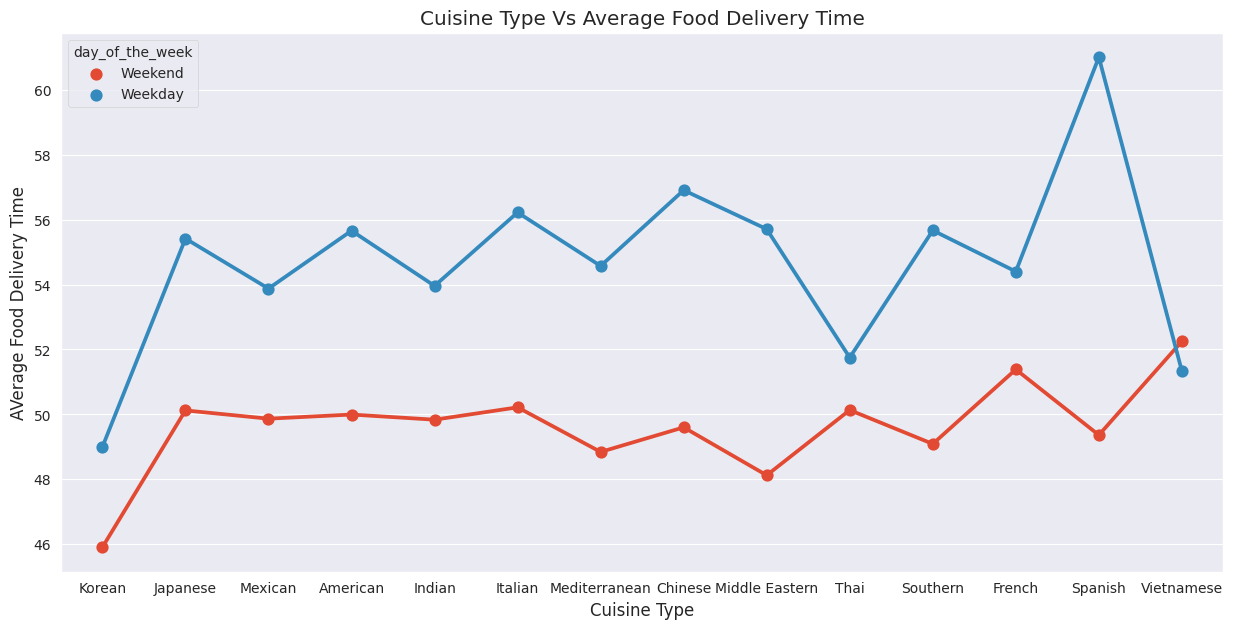

In [ ]:
plt.figure(figsize = (15,7))
sns.pointplot(data= df, x='cuisine_type', y='total_delivery_time',hue='day_of_the_week',estimator = np.average ,errorbar = None)
plt.title('Cuisine Type Vs Average Food Delivery Time')
plt.xlabel('Cuisine Type')
plt.ylabel('AVerage Food Delivery Time')
plt.show()

- *The average food delivery time ranges between 49 and 61 mins for most of the cuisines on weekdays*
- *The average food delivery time ranges between 46 and 52 mins for most of the cuisines on weekends*
- *The average food delivery time is high for all the cuisines except for Vietnamese on weekdays compared  to weekends*
- *The average food delivery time for Korean cuisine is the  lowest on both weekdays and weekends*
- *The average food delivery time is highest for Spanish cuisine(61 mins) on weekdays and Vietnamese(52.2mins) on weekends*


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

- *The most favorite cuisine on both weekdays and weekends is American*
- *The major contributors in the app are American, Japanese,Italian and Chinese cuisines in number of orders*
- *Korean, Spanish and Vietnamese have the lowest number of orders*
- *Only 3  restaurants got more than 100 orders through the app and top 5 restaurants are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, Parm in terms of number of orders received*
- *The top 5 customer ids who orders in Foodhub app  are 52832, 47440, 83287, 250494, 65009*
- *About 29.24% of orders cost more than 20 dollars and company makes more revenue on orders greater than 20 dollars which shows that Foodhub app is having a possitive growth*
- *Most of the cuisines have their majority of orders prepared at a lesser time on weekdays as compared to weekends which is due to the less number of orders in weekdays*
- *The average delivery time for an order through the app is 24.16mins*
- *The average delivery time is usually high on weekdays than weekends for most of the cuisines which can be due to the increased traffic*
- *The delay in delivery on weekdays needs to be addressed to improve orders*
- *Japanese, American, Italian and Chinese have a significant percentage of orders with delivery time > 60 min. This is due to the large number of orders.*
- *The net revenue of Foodhub Company is 6166.303 dollars*
- *There are 4 restaurants that have number of ratings more than 50 and average rating greater than 4*




### Recommendations:
* FoodHub app should promote restaurants with American, Japanese, Italian and Chinese cuisines
* Avoid taking up new restaurants in Korean, Spanish and Vietnamese cuisines
* Give promotional offers in the advertisments for Shake Shack, The Meatball Shop, Blue Ribbon Sushi and Blue Ribbon Fried Chicken
* Give 20% discount voucher to the top 5 most frequent customers 47440, 83287, 250494, 65009
* Improve the user experience on the app
* Give recommendations for the customer based on their place of delivery to minimize delivery time.
* More delivering persons should be hired to address the delay in delivery
* Users should be prompted to give rating and reviews on the FoodHub app.
